In [1]:
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import numpy as np
from IPython.display import display
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster
from folium.plugins import MarkerCluster
%matplotlib inline
import os

pd.options.display.max_columns = None

# Data Source

In [2]:
csv = '/Users/nonoumasy/Dropbox/reference/data/Los_Angeles_Collisions_2013through2018.csv'
df = pd.read_csv(csv)

# Pre-process data

In [4]:
#column cleanup
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')  

#drop duplicate rows
df.drop_duplicates(keep='first')  

#replaces missing values with a value
df.fillna(value=0 ,inplace=True)  

#use only these columns
df = df[['accident_year','proc_date', 'juris','collision_date', 'collision_time',
         'day_of_week','primary_rd', 'secondary_rd', 'direction', 'intersection',
         'hit_and_run','type_of_collision', 'road_surface', 'road_cond_1', 'lighting',
         'bicycle_accident', 'alcohol_involved', 'count_bicyclist_killed', 'count_bicyclist_injured',
         'month_', 'point_x', 'point_y', 'match_addr', 'm_primaryrd', 'm_secondrd',]]  

#bicycle accidents dataset
df = df[df['bicycle_accident'] == 'Y']

#drop an outlier datapoint
df = df[df.match_addr != '2ND ST & AZUSA AVE,, CA']

#atwater dataset
atwater = df[(df.point_x <= -118.24) & (df.point_x >= -118.27) & (df.point_y >= 34.10) & (df.point_y <= 34.15)]  


In [7]:
df.columns

Index(['accident_year', 'proc_date', 'juris', 'collision_date',
       'collision_time', 'day_of_week', 'primary_rd', 'secondary_rd',
       'direction', 'intersection', 'hit_and_run', 'type_of_collision',
       'road_surface', 'road_cond_1', 'lighting', 'bicycle_accident',
       'alcohol_involved', 'count_bicyclist_killed', 'count_bicyclist_injured',
       'month_', 'point_x', 'point_y', 'match_addr', 'm_primaryrd',
       'm_secondrd'],
      dtype='object')

# Analysis

Total Bicyclist Fatalities in Los Angeles from 2013-12018 is: 78

Total Bicyclist Fatalities in Los Angeles from 2013-12018 is: 10862

Yearly Bicyclist Accidents in Los Angeles from 2013-12018 is: 
2013    2414
2014    2309
2015    2161
2016    2002
2017    1984
2018     768
Name: accident_year, dtype: int64

Bicyclist Accidents in Los Angeles from 2013-12018 by month is: 
1      900
2      987
3     1092
4     1100
5     1103
6      971
7      974
8      986
9      952
10     991
11     872
12     710
Name: month_, dtype: int64

Top 10 roads with the most bicycle accidents in Los Angeles 2013-2018


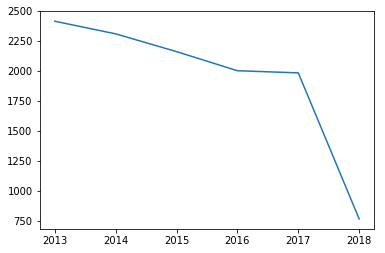

In [9]:
# number of bycyclist fatalities
print("Total Bicyclist Fatalities in Los Angeles from 2013-12018 is: " + str(len(df[df['count_bicyclist_killed'] == 1])))
print()
# number of bycyclist injuries(non-fatal)
print("Total Bicyclist Fatalities in Los Angeles from 2013-12018 is: " + str(len(df[df['count_bicyclist_injured'] == 1])))
print()
# Bicycle accidents by year
print("Yearly Bicyclist Accidents in Los Angeles from 2013-12018 is: ")
print(df.accident_year.value_counts().sort_index(ascending=True))
print()
# Bicycle accidents by month
print("Bicyclist Accidents in Los Angeles from 2013-12018 by month is: ")
print(df.month_.value_counts().sort_index(ascending=True))
print()

# Top 10 roads with the most bicycle accidents
print('Top 10 roads with the most bicycle accidents in Los Angeles 2013-2018')
df.m_primaryrd.value_counts().head(10)

#Show Map
df.accident_year.value_counts().sort_index(ascending=True).plot()

# Map

In [ ]:
m=folium.Map(location=[34.1, -118.3], 
             zoom_start=11, 
             tiles='stamenterrain', 
             no_wrap=True,)

mc = folium.plugins.MarkerCluster().add_to(m)


heat_df = df[['point_y', 'point_x']]
heat_data = [[row['point_y'],row['point_x']] for index, row in heat_df.iterrows()]
plugins.HeatMap(heat_data, 
                radius=5,
                max_zoom=12,
                max_val=0.7,
                gradient={0.4: 'blue', 0.65: 'lime', .8: 'red'},
               ).add_to(mc)
'''
# Map of Bicycle Accident in/or around Atwater Village
for lon,lat, addr in zip(atwater.point_y, atwater.point_x, atwater.match_addr ):
    folium.CircleMarker(location=[lon, lat],
                        fill_color='red',
                        fill_opacity=0.5,
                        popup = str(addr)).add_to(mc)
'''

# Map of Bicycle Accident in LA
for lon,lat, addr in zip(df.point_y, df.point_x, df.match_addr ):
    folium.CircleMarker(location=[lon, lat],
                       fill_color='red',
                       popup = str(addr)).add_to(mc)

    
folium.plugins.Fullscreen().add_to(m)
m.save('/Users/nonoumasy/Desktop/temp.html')
m
